In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import pylab
import numpy as np
import statsmodels
from scipy import stats

In [2]:
df = pd.read_csv('human_body_temperature.csv')
temp = df['temperature']

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


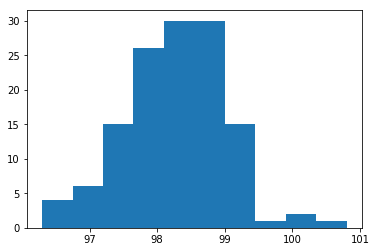

In [5]:
#1. normality test
_= plt.hist(df['temperature'])
plt.show()

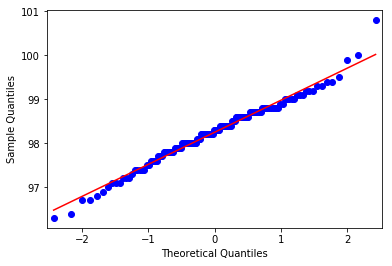

In [9]:
sm.qqplot(df['temperature'], loc = 4, scale = 3, line='s')
pylab.show()

In [11]:
#2. Is the sample size large? Are the observations independent?
df.info()
#Ans: There is 130 sample. since the qqplot and histogram shows normality, it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [19]:
#3. hypothesis test: 
#Ho = 98.6 degrees F, H1 =/= 98.6
# The test will be two-sample test because the if the human temperature goes too low or high, the person will deceased. 
# for 2 tailed test, the best test between t and z is t test. 
# since the z-test is preferred for known standard deviation. 


In [13]:
def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size) :
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [30]:
bs_reps= draw_bs_reps(temp, np.mean, size=1000)

In [26]:
p = np.sum(bs_reps >= 98.6) / len(bs_reps)
print('P-value =',p)

P-value = 0.0


In [29]:
# since the p value is 0.0, it rejects null hypothesis and the true mean of temperature is not 98.6 
# It is either greater or less than 98.6

In [38]:
sample = np.random.choice(temp, size=10)

In [41]:
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-5.78005976691331, pvalue=0.00026604612685517776)

In [43]:
# Since we do not know the standard deviation, z- test could not be done. with the sample size of 10, 
# p-value is still less than 0.05, which rejects the null hypothesis 

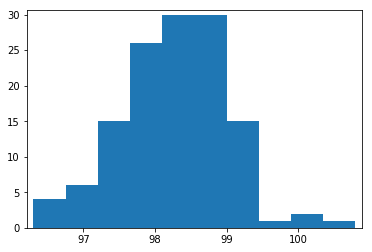

In [50]:
#5. At what temperature should we consider someone's temperature to be "abnormal"?
_ = _= plt.hist(df['temperature'])
_ = plt.margins(0.02)

In [47]:
conf_int = np.percentile(temp,[2.5,97.5])

print('95% confidence interval =', conf_int)


95% confidence interval = [96.7225 99.4775]


In [ ]:
# any data above 99.4775 and below 96.7225 seems abnormal value in temperature


In [88]:
#6. Is there a significant difference between males and females in normal temperature?


In [84]:
male = temp[df['gender']=='M']
female = temp[df['gender']=='F']
combined_mean = np.mean(temp)
mean_diff = np.mean(male) - np.mean(female)

In [81]:
male_shifted = male - np.mean(male) + combined_mean
female_shifted = female - np.mean(female) + combined_mean

In [82]:
# null hypothesis : There is no difference between temperature mean of male and female's
male_rep = draw_bs_reps(male_shifted, np.mean,10000)
female_rep = draw_bs_reps(female_shifted, np.mean, 10000)


In [83]:
diff = male_rep - female_rep

In [85]:
p= np.sum(diff >= mean_diff)/len(diff)

In [86]:
print('p =',p)

p = 0.9885


In [87]:
# the p value is 0.9885. since it is larger than 0.05, 
#it fail to reject null hypothesis and there is no difference between
#temperature between male and female 